# Reducción de dimensionalidad

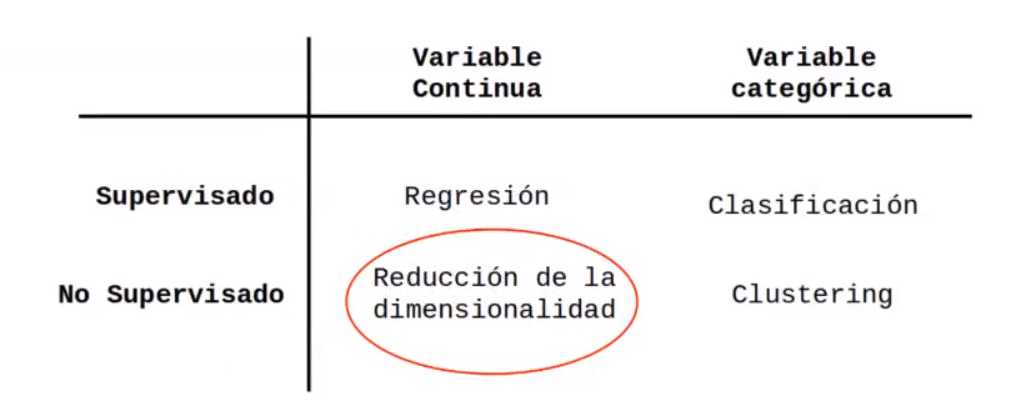


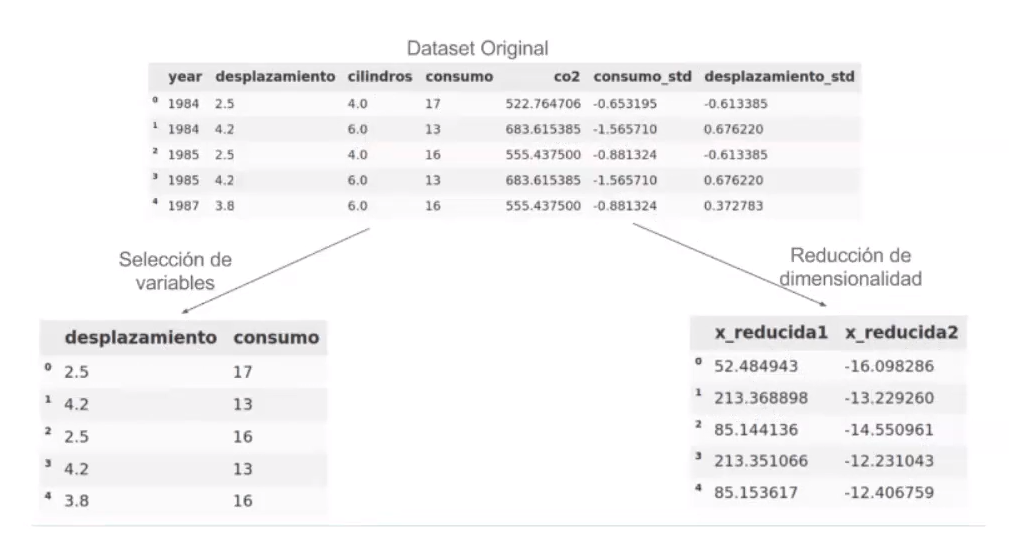

## Análisis de componentes principales (PCA)

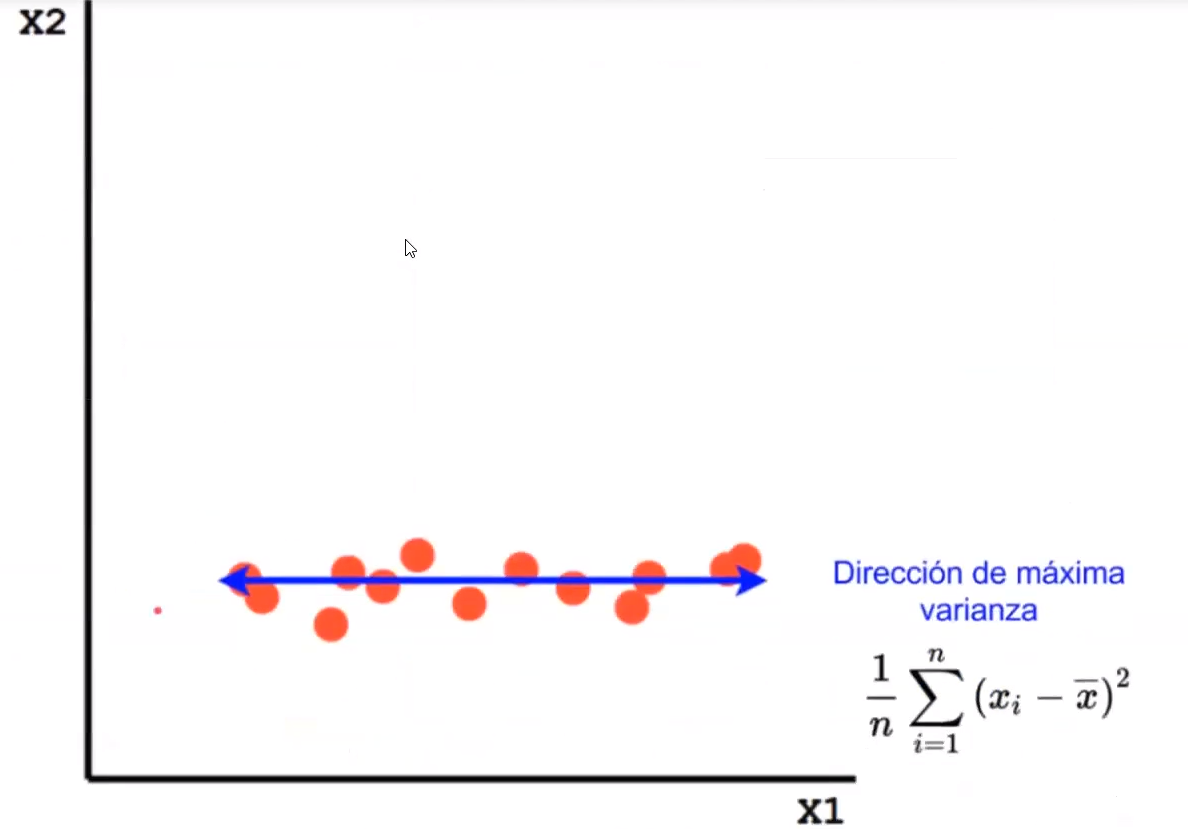

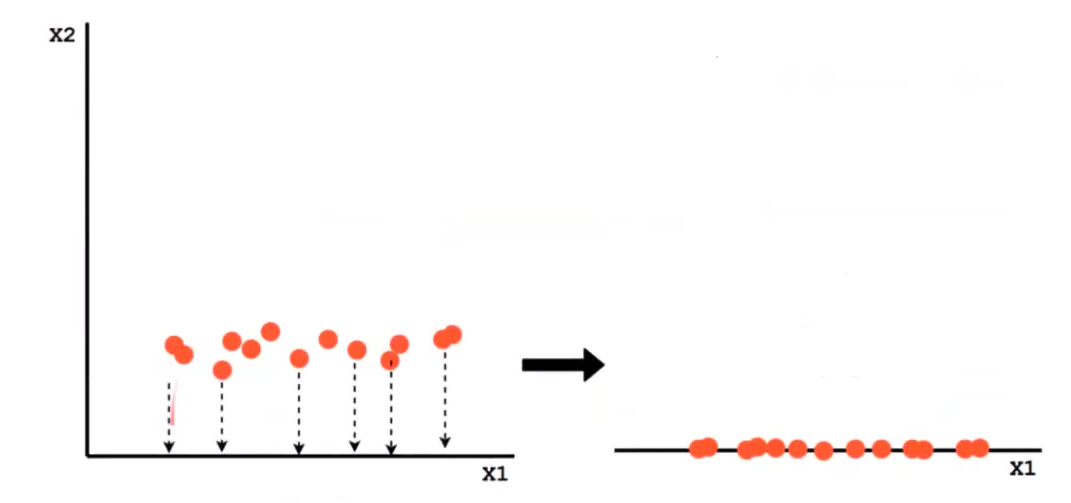

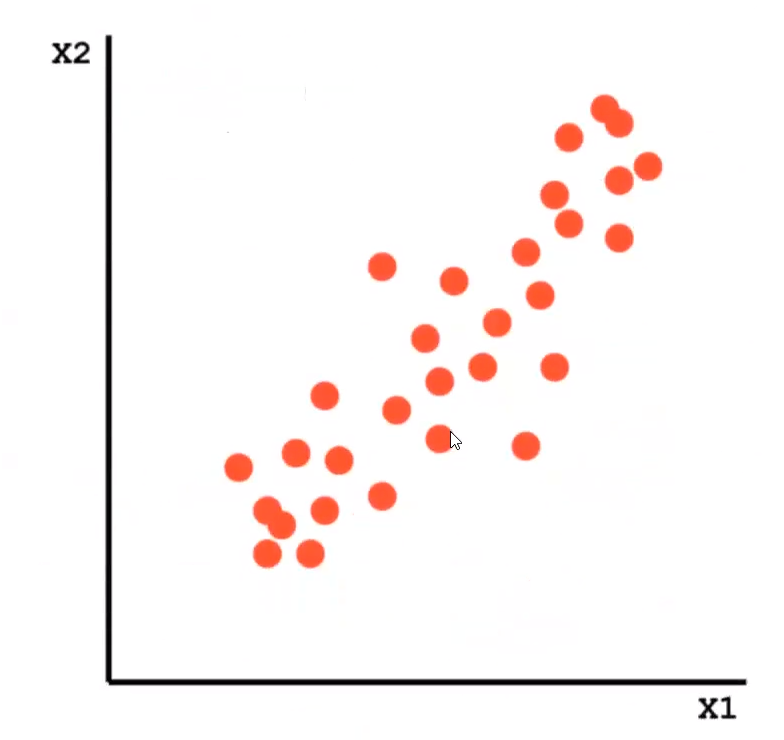

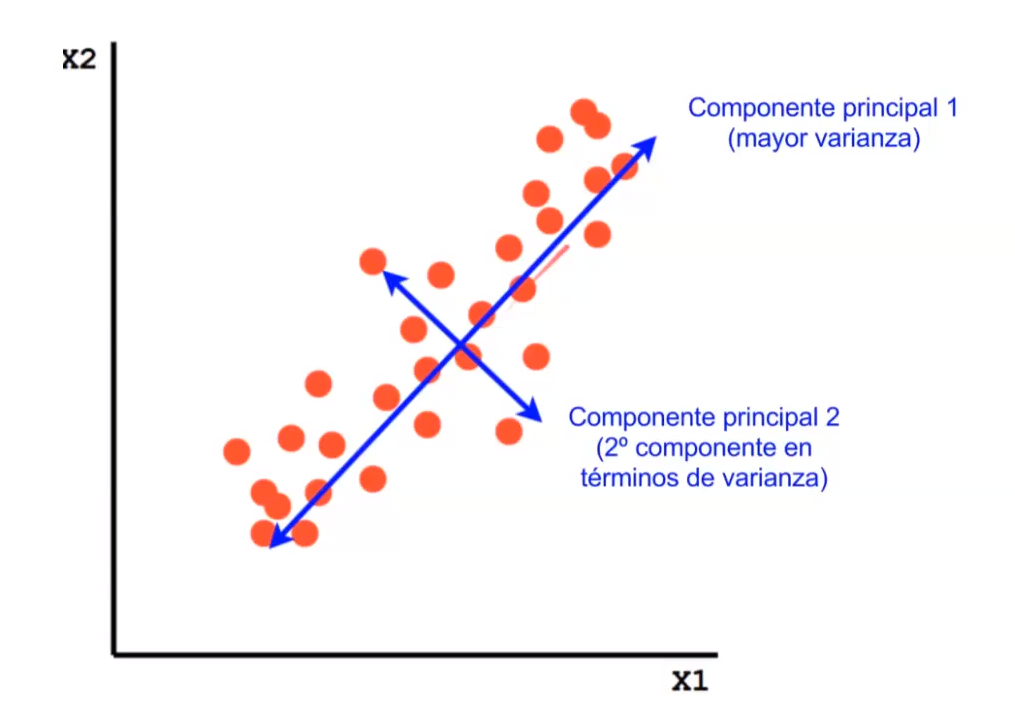

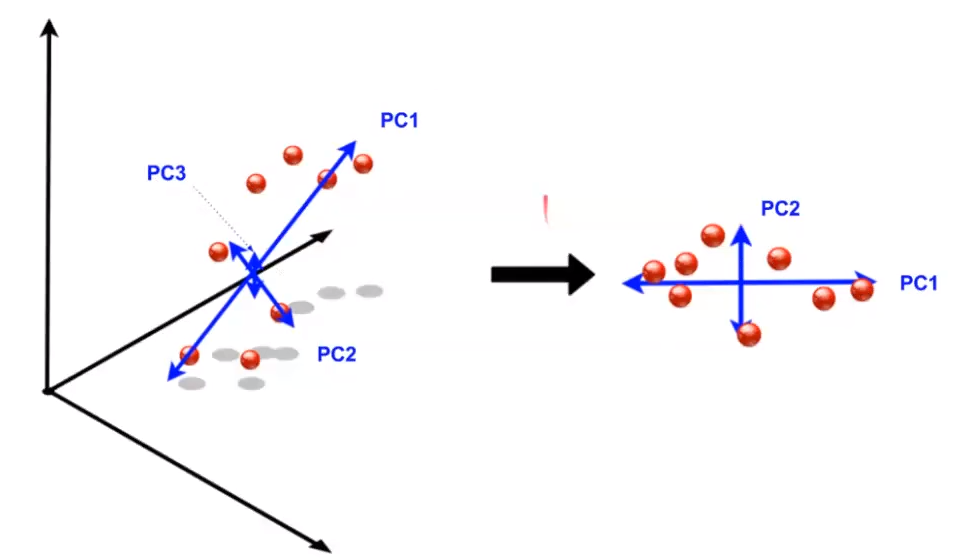

 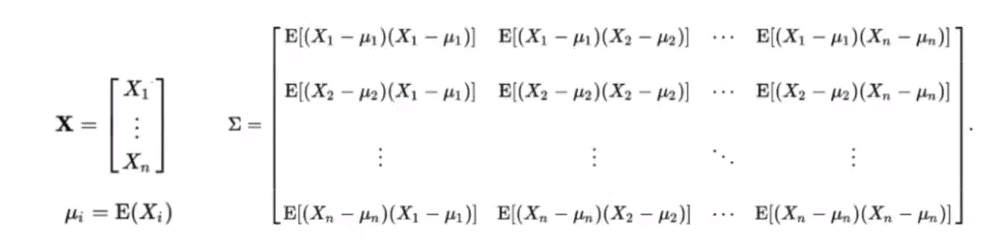

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize']=[10,10]
np.random.seed(42)

### Ejemplo 1:

Usando el dataset de flores Iris, aplicando PCA reduciremos su dimensión de 3 a 2 dimensiones

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
%matplotlib notebook

In [6]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

##### Usando gráficos en 3D

In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [8]:
import ipywidgets as widgets
from IPython.display import display

<IPython.core.display.Javascript object>


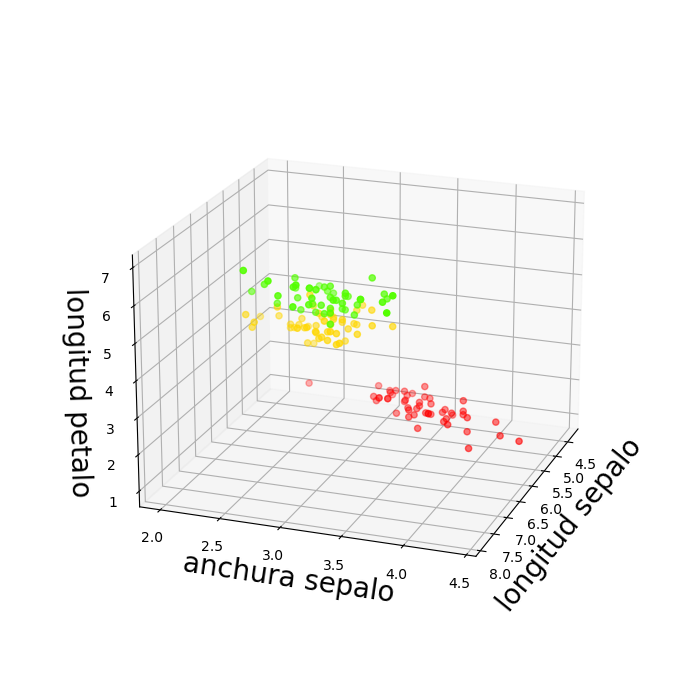

IntSlider(value=20, max=90)

In [9]:
fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('longitud sepalo',size=20)
ax.set_ylabel('anchura sepalo',size=20)
ax.set_zlabel('longitud petalo',size=20)
ax.scatter(iris.data[:,0],iris.data[:,1],iris.data[:,2],c=iris.target,cmap=cm.prism)
ax.view_init(20,20)
plt.show()

def actualizar_grafica(angulo1=20, angulo2=120):
    ax.view_init(angulo1,angulo2)
    fig.canvas_draw_idle()
    
#ipywidgets
angulo1_slider=widgets.IntSlider(20,min=0,max=90)
display(angulo1_slider)

def actualizar_angulo1(value):
    actualizar_grafica(angulo1=value['new'])
    
angulo1_slider.observe(actualizar_angulo1,names='values');

### Paso 1: Centrar los datos.

Restar a cada variable su medida.

In [10]:
iris_centrado=(iris.data-iris.data.mean(axis=0))[:,:3]

In [11]:
iris_centrado[:10]

array([[-0.74333333,  0.44266667, -2.358     ],
       [-0.94333333, -0.05733333, -2.358     ],
       [-1.14333333,  0.14266667, -2.458     ],
       [-1.24333333,  0.04266667, -2.258     ],
       [-0.84333333,  0.54266667, -2.358     ],
       [-0.44333333,  0.84266667, -2.058     ],
       [-1.24333333,  0.34266667, -2.358     ],
       [-0.84333333,  0.34266667, -2.258     ],
       [-1.44333333, -0.15733333, -2.358     ],
       [-0.94333333,  0.04266667, -2.258     ]])

### Paso 2: Definiendo la varianza.

In [12]:
def varianza(var1, var2=None):
    if var2 is None:
        var2=var1
    assert var1.shape==var2.shape
    var1_mean=var1.mean()
    var2_mean=var2.mean()
    return np.sum((var1-var1_mean)*(var2-var2_mean))/(var1.shape[0]-1)

In [13]:
var1=np.array([5,10,17,35])
var2=np.array([34,70,75,50])

In [14]:
varianza(var1,var2)

19.75

In [15]:
varianza(var1)

172.25

In [16]:
varianza(var2)

356.9166666666667

In [17]:
np.cov(np.array([var1,var2]))

array([[172.25      ,  19.75      ],
       [ 19.75      , 356.91666667]])

In [18]:
cov_mat = np.cov(m=iris_centrado.T)
cov_mat

array([[ 0.68569351, -0.042434  ,  1.27431544],
       [-0.042434  ,  0.18997942, -0.32965638],
       [ 1.27431544, -0.32965638,  3.11627785]])

### Paso 3: Descomponer matriz de covarianza.

In [19]:
val_propios, vec_propios=np.linalg.eig(cov_mat)

In [20]:
print('Vectores propios: ',vec_propios)

Vectores propios:  [[-0.38983343  0.66289026  0.63922328]
 [ 0.09100801 -0.66300933  0.74305866]
 [-0.91637735 -0.34784355 -0.19813487]]


In [21]:
print('Valores propios: ',val_propios)

Valores propios:  [3.69111979 0.05945372 0.24137727]


In [22]:
np.argsort(val_propios)[::-1]

array([0, 2, 1], dtype=int64)

In [23]:
orden_componentes=np.argsort(val_propios)[::-1]
val_propios_ordenados = val_propios[orden_componentes]
vec_propios_ordenados = vec_propios[:,orden_componentes]

In [24]:
print('Vectores propios ordenados: ',vec_propios_ordenados)

Vectores propios ordenados:  [[-0.38983343  0.63922328  0.66289026]
 [ 0.09100801  0.74305866 -0.66300933]
 [-0.91637735 -0.19813487 -0.34784355]]


In [25]:
print('Valores propios ordenados: ',val_propios_ordenados)

Valores propios ordenados:  [3.69111979 0.24137727 0.05945372]


In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

In [27]:
class Arrow3D(FancyArrowPatch):
    def __init__(self,xs,ys,zs,*args,**kwargs):
        FancyArrowPatch.__init__(self,(0,0),(0,0),*args,**kwargs)
        self.verts3d = xs,ys,zs
    
    def draw(self,renderer):
        xs3d,ys3d,zs3d = self._verts3d
        xs,ys,zs = proj3d.proj_transform(xs3d,ys3d,zs3d,renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self,renderer)

##### Origen medias de las variables

In [28]:
media_x=iris_centrado[:,0].mean()
media_y=iris_centrado[:,1].mean()
media_z=iris_centrado[:,2].mean()
media_x,media_y,media_z

(-1.1842378929335002e-15, -7.815970093361102e-16, -2.7474319116057207e-15)

#### Debería salir de la siguiente manera:

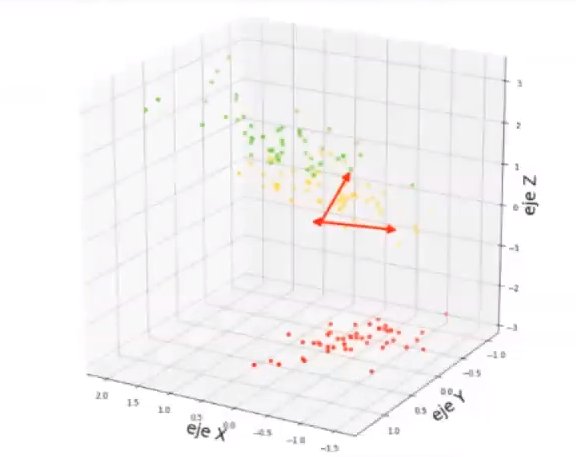


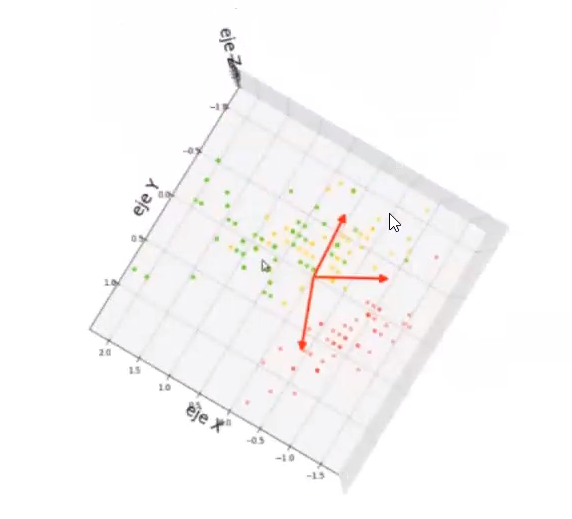

<IPython.core.display.Javascript object>


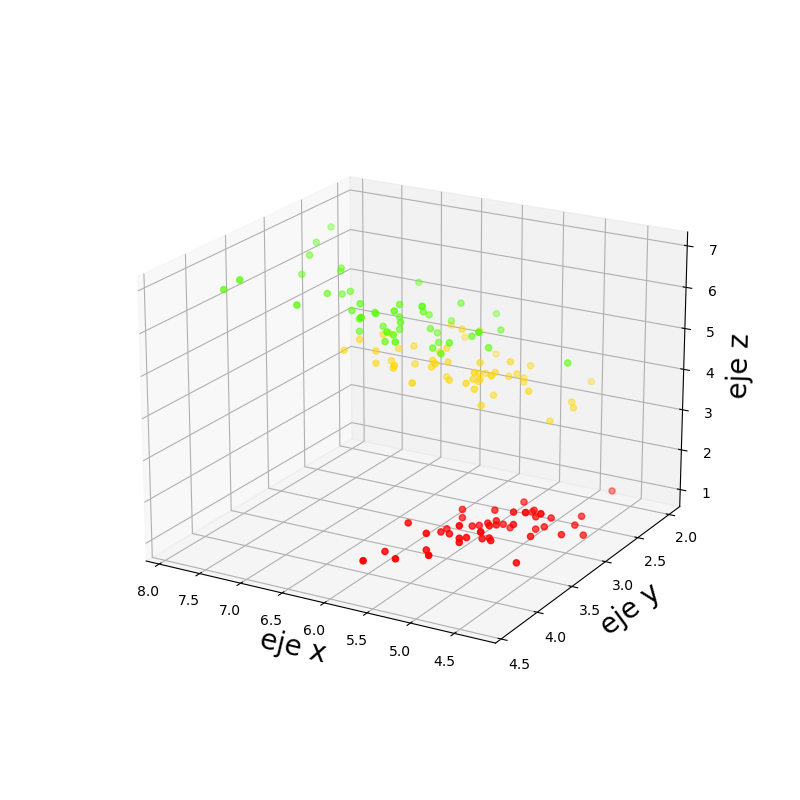

IntSlider(value=20, max=90)

In [29]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('eje x',size=20)
ax.set_ylabel('eje y',size=20)
ax.set_zlabel('eje z',size=20)
ax.scatter(iris.data[:,0],iris.data[:,1],iris.data[:,2],c=iris.target,cmap=cm.prism)

#for v in vec_propios:
#    a = Arrow3D([media_x,v[0]],[media_y,[1]], [media_z,v[2]], mutation_scale=20,lw=3,arrowstyle='-|>',color='r')
#    ax.add_artist(a)
    
ax.view_init(20,120)

def actualizar_grafica(angulo1=20, angulo2=120):
    ax.view_init(angulo1,angulo2)
    fig.canvas_draw_idle()
    
angulo1_slider=widgets.IntSlider(20,min=0,max=90)
display(angulo1_slider)

def actualizar_angulo1(value):
    actualizar_grafica(angulo1=value['new'])
    
angulo1_slider.observe(actualizar_angulo1,names='value');

<IPython.core.display.Javascript object>


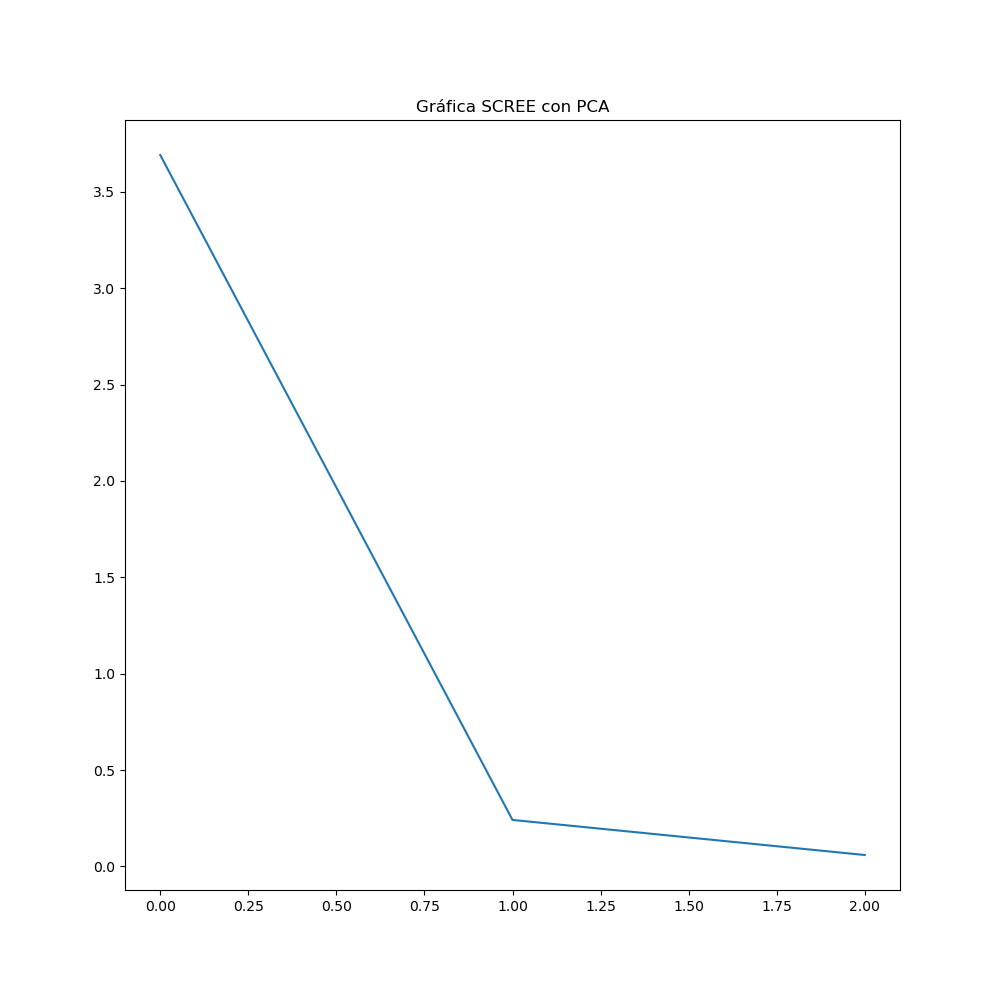

In [31]:
plt.plot(val_propios_ordenados)
#plt.plot(val_propios_ordenados,vec_propios_ordenados)
plt.title('Gráfica SCREE con PCA');

In [32]:
print("""
PCA 1: {0:.2f}% varianza
PCA 2: {1:.2f}% varianza
PCA 3: {2:.2f}% varianza
""".format(*tuple(val_propios_ordenados/val_propios_ordenados.sum()*100)))


PCA 1: 92.46% varianza
PCA 2: 6.05% varianza
PCA 3: 1.49% varianza



In [33]:
val_propios_ordenados

array([3.69111979, 0.24137727, 0.05945372])

### Reduciendo dataset original de 3 a 2 dimensiones

In [34]:
vec_propios_ordenados[:,:2].T

array([[-0.38983343,  0.09100801, -0.91637735],
       [ 0.63922328,  0.74305866, -0.19813487]])

In [35]:
iris_coord_princ = iris_centrado @ vec_propios_ordenados[:,:2]

In [36]:
iris_coord_princ[:10]

array([[ 2.49088018,  0.32097336],
       [ 2.52334286, -0.17840062],
       [ 2.71114888, -0.13782006],
       [ 2.55775595, -0.31567523],
       [ 2.53896432,  0.3313569 ],
       [ 2.13542015,  0.75052335],
       [ 2.67669609, -0.07294414],
       [ 2.42912498,  0.16293168],
       [ 2.70915877, -0.57231813],
       [ 2.44080592, -0.12390824]])

<IPython.core.display.Javascript object>


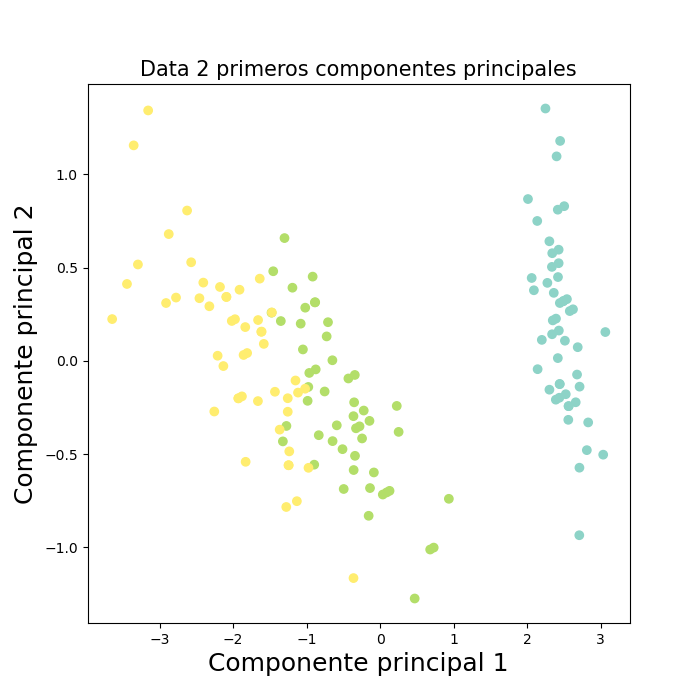

In [38]:
fig = plt.figure(figsize=(7,7))
plt.scatter(iris_coord_princ[:,0],iris_coord_princ[:,1],c=iris.target,cmap=cm.Set3)
plt.title('Data 2 primeros componentes principales', size=15)
plt.xlabel('Componente principal 1',size=18)
plt.ylabel('Componente principal 2',size=18);

#### PCA con sklearn

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_centrado)

In [40]:
pca.components_

array([[ 0.38983343, -0.09100801,  0.91637735],
       [ 0.63922328,  0.74305866, -0.19813487]])

In [41]:
vec_propios_ordenados[:,:2].T

array([[-0.38983343,  0.09100801, -0.91637735],
       [ 0.63922328,  0.74305866, -0.19813487]])

In [42]:
pca.explained_variance_ratio_

array([0.92464061, 0.06046599])

<IPython.core.display.Javascript object>


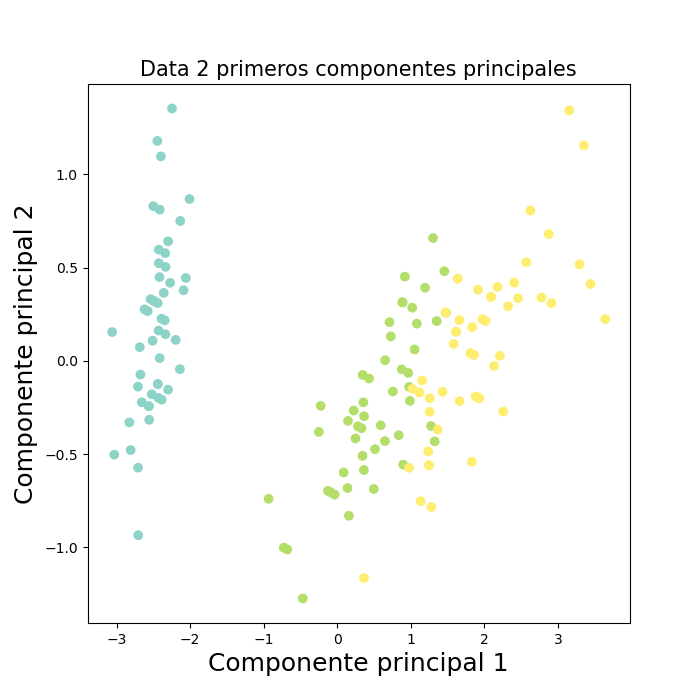

In [43]:
fig=plt.figure(figsize=(7,7))
plt.scatter(iris_pca[:,0],iris_pca[:,1], c=iris.target,cmap=cm.Set3)
plt.title('Data 2 primeros componentes principales',size=15)
plt.xlabel('Componente principal 1',size=18)
plt.ylabel('Componente principal 2',size=18);

### Ejemplo 2:

Usando el dataset de breast cancer, aplicando PCA reduciremos su dimensión de 3 a 2 dimensiones

In [44]:
from sklearn.datasets import load_breast_cancer

In [45]:
cancer=load_breast_cancer()
cancer.data.shape

(569, 30)

In [46]:
from sklearn.preprocessing import StandardScaler
scalador=StandardScaler()
scalador.fit(cancer.data)
cancer_escalado=scalador.transform(cancer.data)

In [47]:
pca=PCA(n_components=2)
pca.fit(cancer_escalado)
cancer_pca=pca.transform(cancer_escalado)

<IPython.core.display.Javascript object>


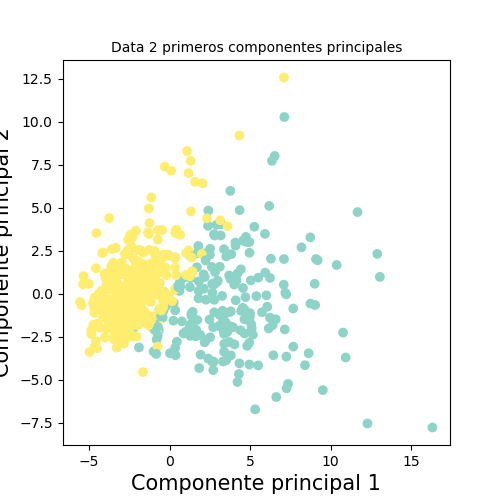

In [48]:
fig=plt.figure(figsize=(5,5))
plt.scatter(cancer_pca[:,0],cancer_pca[:,1],c=cancer.target,cmap=cm.Set3)
plt.title('Data 2 primeros componentes principales',size=10)
plt.xlabel('Componente principal 1',size=15)
plt.ylabel('Componente principal 2',size=15);

## Ejercicio 3

https://fdc.nal.usda.gov/download-datasets.html#blmk-2

In [49]:
alimentos=pd.read_csv("D:/Data Science Machine Learning & Deep Learning con Python/dataset/food_calorie_conversion_factor.csv")
alimentos.head()

,food_nutrient_conversion_factor_id,protein_value,fat_value,carbohydrate_value
0,22721,4.27,9.02,3.87
1,22722,4.27,8.79,3.87
2,22723,2.44,8.37,3.57
3,22724,4.27,9.02,3.87
4,22725,4.05,8.37,4.12


In [50]:
alimentos.shape

(4824, 4)

In [51]:
nom_alimentos=alimentos['food_nutrient_conversion_factor_id']

In [52]:
alimentos.columns

Index(['food_nutrient_conversion_factor_id', 'protein_value', 'fat_value',
       'carbohydrate_value'],
      dtype='object')

In [53]:
ax = alimentos_datos=alimentos.drop('food_nutrient_conversion_factor_id',axis=1)
ax.head(3)

,protein_value,fat_value,carbohydrate_value
0,4.27,9.02,3.87
1,4.27,8.79,3.87
2,2.44,8.37,3.57


In [54]:
alimentos_datos = StandardScaler().fit_transform(
    ax.drop('carbohydrate_value',axis=1).fillna(0)
)
alimentos_datos

array([[ 0.76582186,  0.49575835],
       [ 0.76582186,  0.18094538],
       [-1.34427859, -0.39393046],
       ...,
       [-1.34427859, -0.39393046],
       [-0.95223807, -0.39393046],
       [-0.95223807, -0.39393046]])

In [55]:
alimentos_pca=PCA(n_components=2).fit_transform(alimentos_datos)

In [56]:
alimentos_datos_df=pd.DataFrame(alimentos_pca,columns=['PC1','PC2'])
alimentos_datos_df['nombre']=nom_alimentos
alimentos_datos_df.head()

,PC1,PC2,nombre
0,-0.892072,0.190964,22721
1,-0.669466,0.413570,22722
2,1.229099,-0.671998,22723
3,-0.892072,0.190964,22724
4,-0.083593,0.640695,22725


# Bokeh
!pip install bokeh

In [57]:
from bokeh.io import output_notebook

In [58]:
from bokeh.plotting import figure,show,ColumnDataSource
from bokeh.models import HoverTool

In [59]:
output_notebook()

Loading BokehJS ...

In [60]:
source = ColumnDataSource(alimentos_datos_df)

hover = HoverTool(tooltips=[
    ('(x,y)','($x,$y)'),
    ('nombre','@nombre'),    
])

p = figure(tools=[hover,"box_zoom","pan","zoom_out","zoom_in"],
          title="2 pca Nutrition")

p.circle('PC1','PC2', size=20, source=source, fill_alpha=0.5)

show(p);